Image shape: (467, 700, 3)


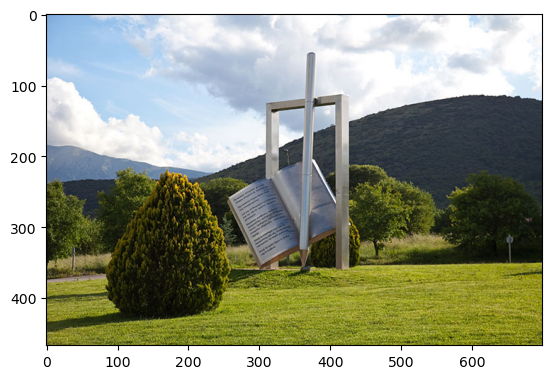

In [5]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/uoi_entrance.jpg') # Read an image 
print("Image shape:", img.shape)           # Print image size and color depth. The shape should be (H,W,C).

plt.imshow(img)                            # Show the original image
plt.show()

In [6]:
import copy
import time
def iterative(img):
    """ Iterative operation. """
    image = copy.deepcopy(img)              # Create a copy of the image matrix
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            #Top Right
            if y < image.shape[0]/2 and x > image.shape[1]/2:
                image[y,x] = image[y,x] * np.array([0,1,0])    # Keep the green channel
            #Bottom Left
            elif y > image.shape[0]/2 and x < image.shape[1]/2:
                image[y,x] = [image[y,x][2], image[y,x][1], image[y,x][0]]  #(B,G,R) image
            #Bottom Right
            elif y > image.shape[0]/2 and x > image.shape[1]/2:
                r,g,b = image[y,x]
                image[y,x] = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return image

def get_channel(img, channel):
    """ Function to extract 2D image corresponding to a channel index from a color image. 
    This function should return a H*W array which is the corresponding channel of the input image. """
    image = copy.deepcopy(img)     # Create a copy so as to not change the original image
    #Red
    if channel == 0:
        return image[:,:,0]
    #Green
    elif channel == 1:
        return image[:,:,1]
    #Βlue
    elif channel == 2:
        return image[:,:,2]
    else:
        raise ValueError("Invalid channel index. Valid values are 0, 1, or 2.")


    
def merge_channels(img0, img1, img2):
    """ Function to merge three single channel images to form a color image. 
    This function should return a H*W*3 array which merges all three single channel images 
    (i.e. img0, img1, img2) in the input."""
    channels = [img0, img1, img2]
    return np.stack(channels, axis=2)
    
    
def vectorized(img):
    """ Vectorized operation. """
    image = copy.deepcopy(img)
    a = int(image.shape[0]/2)
    b = int(image.shape[1]/2)
    # Please also keep the red / green / blue channel respectively in the corresponding part of image
    # with the vectorized operations. You need to make sure your final generated image in this
    # vectorized() function is the same as the one generated from iterative().
    red_ch = get_channel(image, 0)
    green_ch = get_channel(image, 1)
    blue_ch = get_channel(image, 2)
    #Top Right: keep the green channel
    green_img = np.zeros_like(image)
    green_img[:,:,1] = green_ch
    image[0:a,b:image.shape[1]] = green_img[0:a,b:image.shape[1]]
    
    #Bottom Left: (B,G,R) image
    bgr_img = merge_channels(blue_ch,green_ch,red_ch)
    image[a:image.shape[0],0:b] =   bgr_img[a:image.shape[0],0:b]
    
    
    #Bottom Right: Grayscale image
    x= np.array([0.2989, 0.5870, 0.1140])
    gray_img_3d= merge_channels(np.dot(image,x),np.dot(image,x),np.dot(image,x))
    image[a:image.shape[0],b:image.shape[1]] = gray_img_3d[a:image.shape[0],b:image.shape[1]]
    
    return image

Iterative operation (sec): 1.1013801097869873
Vectorized operation (sec): 0.048048973083496094


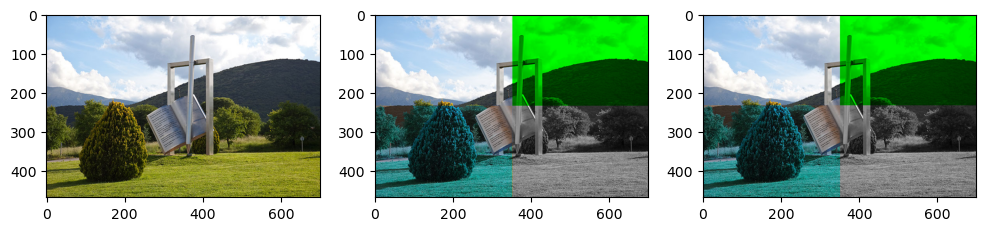

In [7]:
import time

def compare():
    img = plt.imread('images/uoi_entrance.jpg') 
    cur_time = time.time()
    image_iterative = iterative(img)
    print("Iterative operation (sec):", time.time() - cur_time)
    
    cur_time = time.time()
    image_vectorized = vectorized(img)
    print("Vectorized operation (sec):", time.time() - cur_time)
    
    return image_iterative, image_vectorized

# Test your implemented get_channel()
assert len(get_channel(img, 0).shape) == 2  # Index 0

# Run the function
image_iterative, image_vectorized = compare()

# Plotting the results in sepearate subplots.
plt.figure(figsize=(12,4))   # Adjust the figure size.
plt.subplot(1, 3, 1)         # Create 1x3 subplots, indexing from 1
plt.imshow(img)              # Original image.

plt.subplot(1, 3, 2)       
plt.imshow(image_iterative)  # Iterative operations on the image.

plt.subplot(1, 3, 3)
plt.imshow(image_vectorized) # Vectorized operations on the image.

plt.show()                   # Show the figure.

# Note: The shown figures of image_iterative and image_vectorized should be identical!